In [1]:
import db_dtypes

## Importo lo que aparecía en el canvas del curso

In [2]:
import bq_helper
openAQ = bq_helper.BigQueryHelper(active_project= 'bigquery-public-data.nhtsa_traffic_fatalities.accident_2015',
                                 dataset_name='openaq')

#### Se hace la consulta con el fin de poder visualizar la tabla con la que queremos trabajar, que en este caso es la tabla con 70 columnas 

In [3]:
from google.cloud import bigquery
import pandas as pd
import os

# Set the environment variable for the project ID
os.environ["GCLOUD_PROJECT"] = "green-objective-382802"

# Create a client object
client = bigquery.Client()
query = """
SELECT *
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`

"""
query_job = client.query(query)

iterator = query_job.result(timeout=30)
rows = list(iterator)

# Transform the rows into a nice pandas dataframe
headlines = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

# Look at the first 10 headlines
headlines.head(10)

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,30,Montana,300019,5,5,0,0,0,7,7,...,45,0,None,0,None,0,None,1,0,2015-03-28 14:58:00+00:00
1,39,Ohio,390099,7,7,0,0,0,15,15,...,24,27,Backup Due to Prior Crash,0,None,0,None,1,0,2015-02-14 11:19:00+00:00
2,49,Utah,490123,16,16,0,0,0,28,28,...,99,0,None,0,None,0,None,1,0,2015-04-14 12:24:00+00:00
3,48,Texas,481184,6,5,1,0,5,5,10,...,99,0,None,0,None,0,None,1,0,2015-05-27 16:40:00+00:00
4,41,Oregon,410333,11,11,0,0,0,14,14,...,99,0,None,0,None,0,None,1,0,2015-11-17 18:17:00+00:00
5,39,Ohio,390088,8,8,0,0,0,13,13,...,11,0,None,0,None,0,None,1,0,2015-02-14 11:30:00+00:00
6,39,Ohio,390096,31,31,0,0,0,49,49,...,47,0,None,0,None,0,None,1,0,2015-02-14 14:20:00+00:00
7,42,Pennsylvania,420702,9,9,0,0,0,14,14,...,99,0,None,0,None,0,None,2,0,2015-01-18 07:30:00+00:00
8,39,Ohio,390126,29,29,0,0,0,50,50,...,43,14,Motor Vehicle (In Transport 1983-2004) Struck ...,0,None,0,None,1,0,2015-02-14 14:22:00+00:00
9,34,New Jersey,340244,19,19,0,0,0,24,24,...,3,0,None,0,None,0,None,1,0,2015-02-09 21:11:00+00:00


In [4]:
#Esto fue una prueba para poder ver si estaba funcionando el llamar a una columna de la lista y poder verla en formato tabla
Busco = """
SELECT  county
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015

"""

p1 = openAQ.query_to_pandas(Busco)
p1

,county
0,111
1,171
2,45
3,65
4,59
...,...
32533,13
32534,181
32535,63
32536,173


In [5]:
#Este es otra prueba porque quería estar segura que de verdad estaba funcionando
query1 = """
SELECT number_of_forms_submitted_for_persons_not_in_motor_vehicles
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015

"""

p2 = openAQ.query_to_pandas(query1)
p2

,number_of_forms_submitted_for_persons_not_in_motor_vehicles
0,0
1,0
2,0
3,0
4,0
...,...
32533,0
32534,0
32535,0
32536,0


### 2.1. Mayor número de accidentes por estado (`state_name`).

In [6]:
query2 = """
SELECT state_name, COUNT(*) as num_accidents
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015
GROUP BY state_name
ORDER BY num_accidents DESC
"""
#Hago la consulta para poder obtener los datos de mayor número de accidentes por estado
p3 = openAQ.query_to_pandas(query2) #se almacenan los resultados de la consulta en un dataframe (p3)
p3

,state_name,num_accidents
0,Texas,3190
1,California,3123
2,Florida,2699
3,Georgia,1329
4,North Carolina,1275
5,Pennsylvania,1102
6,New York,1061
7,Ohio,1029
8,Illinois,914
9,South Carolina,911


In [7]:
#Los resultados que guarde en p3 los paso a un csv
p3.to_csv('state_name.csv', index=False)

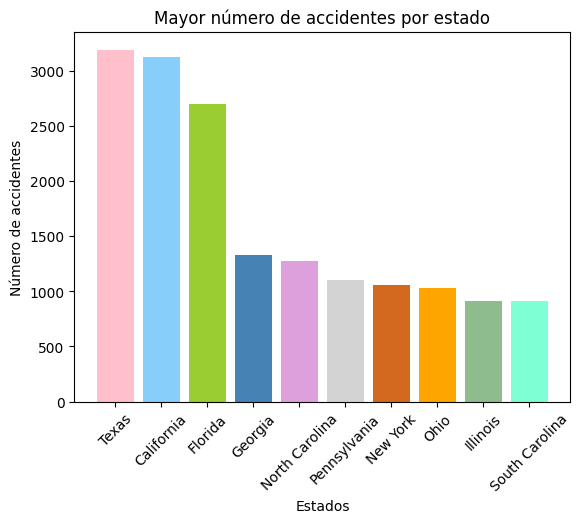

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
#se lee el csv que creé con p3 para poder graficarlos 
df = pd.read_csv('C:/Users/carol/OneDrive/Documentos/Universidat/Minería de datos/state_name.csv')
df = df.head(10)
colores = ['pink', 'lightskyblue', 'yellowgreen', 'steelblue', 'plum', 'lightgray', 'chocolate', 'orange', 'darkseagreen', 'aquamarine']
plt.bar(df['state_name'], df['num_accidents'], color=colores) #las variables del grafico: estado y número de accidentes
plt.title('Mayor número de accidentes por estado')
plt.ylabel('Número de accidentes')
plt.xlabel('Estados')
plt.xticks(rotation=45)
plt.show()

### 2.2 Mayor número de accidentes por uso de tierra (`land_use`).

In [9]:
query3 = """
SELECT land_use_name, COUNT(*) as num_accidents
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015
GROUP BY land_use_name
ORDER BY num_accidents DESC
"""
#hago la consulta para obtener los accidentes por uso de tierra
p4 = openAQ.query_to_pandas(query3)
p4

,land_use_name,num_accidents
0,Urban,16494
1,Rural,15860
2,Trafficway Not in State Inventory,150
3,Unknown,24
4,Not Reported,10


In [10]:
p4.to_csv('land_use_name.csv', index=False)

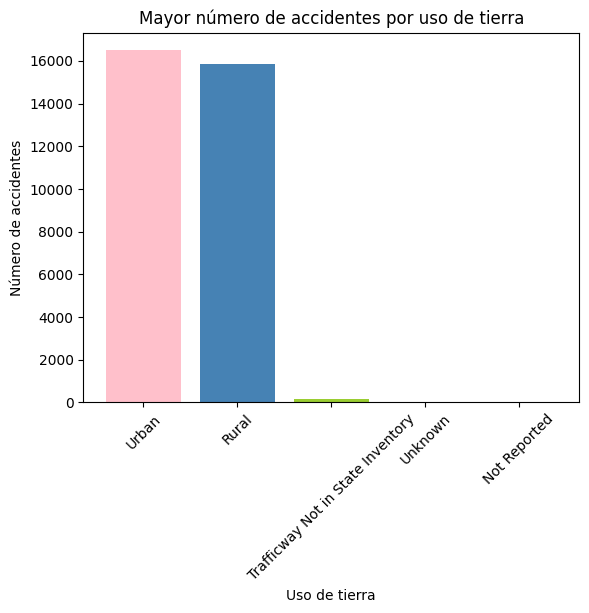

In [11]:
#se lee el csv que creé con p3 para poder graficarlos 
df = pd.read_csv("C:/Users/carol/Downloads/land_use_name.csv")
colores = ['pink', 'steelblue', 'yellowgreen', 'lightskyblue', 'plum']
plt.bar(df['land_use_name'], df['num_accidents'], color=colores) #las variables del grafico: uso de tierra y número de accidentes
plt.title('Mayor número de accidentes por uso de tierra')
plt.ylabel('Número de accidentes')
plt.xlabel('Uso de tierra')
plt.xticks(rotation=45)
plt.show()

### 2.3. Mayor número de accidentes por empresa de carreteras (`ownership_name`).

In [12]:
#Nuevamente se hace el mismo procedimiento que utilicé para el 2.1 y 2.2, se hace la consulta, se pasa a csv y luego se grafica
query4 = """
SELECT ownership_name, COUNT(*) as num_accidents
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015
GROUP BY ownership_name
ORDER BY num_accidents DESC
"""

p5 = openAQ.query_to_pandas(query4)
p5

,ownership_name,num_accidents
0,State Highway Agency,16107
1,Not Reported,6388
2,City or Municipal Highway Agency,3390
3,County Highway Agency,3295
4,Unknown,1139
5,Town or Township Highway Agency,1046
6,Other Local Agency,738
7,Trafficway Not in State Inventory,150
8,State Toll Road,80
9,Other Federal Agency,56


In [13]:
p5.to_csv('ownership_name.csv', index=False)

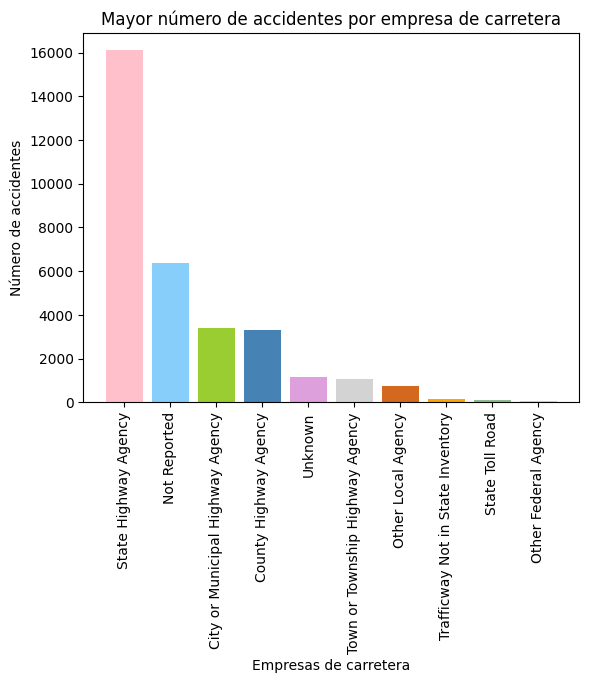

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("C:/Users/carol/Downloads/ownership_name.csv")
df = df.head(10) #Se ven solo los primeros 10 ya que el resto tiene tan bajo número de accidentes que no se aprecia en el gráfico, los 10 primeros son los únicos que por lo menos la barra se ve
colores = ['pink', 'lightskyblue', 'yellowgreen', 'steelblue', 'plum', 'lightgray', 'chocolate', 'orange', 'darkseagreen', 'aquamarine']
plt.bar(df['ownership_name'], df['num_accidents'], color=colores)
plt.title('Mayor número de accidentes por empresa de carretera')
plt.ylabel('Número de accidentes')
plt.xlabel('Empresas de carretera')
plt.xticks(rotation=90)
plt.show()